## Travaux pratiques n1

### Exercice 1: Calcul Scientifique avec numpy

In [13]:
import numpy as np

In [14]:
sales = np.array([
  [100, 200, 150],
  [250, 300, 200],
  [175, 225, 275],
  [300, 250, 225]
])

1. Moyenne globale des ventes

In [15]:
moy_glob = np.mean(sales)
moy_glob

220.83333333333334

2. Somme des ventes pour chaque produit, en exculant le mois de Janvier

In [16]:
s_v1 = np.sum(sales[1:], axis=0)

3. Somme des ventes pour chaque produit pour les mois ou les vents ont été supérieurs à la moyenne globale.

In [17]:
np.where(sales<moy_glob, 0, sales).sum(axis=0)

array([550, 775, 500])

4. Créer un tableau de booléan indiquant si chaque vente est supérieur ou égale à 200

In [18]:
sales_bool = np.where(sales >= 200, True, False)
sales 
sales_bool

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True]])

5. Afficher la position du plus grand élément des 'sales' sous forme d'un tuple (ligne, colonne)

In [19]:
# TODO
res = (int(np.argmax(sales)+1) // len(sales), int(np.argmax(sales)+1) % len(sales))
np.unravel_index(np.argmax(sales), sales.shape)

(1, 1)

## Exercice 2 - Exploration des données avec pandas

1. Generer un Dataframe

In [20]:
import pandas as pd

In [21]:
biens=np.array([
  [85, 120],
  [100, 200],
  [85, 150],
  [200, 180],
  [100, 420],
  [300, 330],
  [400, 400]
])
biens.shape

(7, 2)

In [22]:
df_biens = pd.DataFrame(biens, columns=["surface", "prix"])
df_biens.head()

,surface,prix
0,85,120
1,100,200
2,85,150
3,200,180
4,100,420


2. Afficher les surfaecs des biens ayant un prix supérieur ou égal à 300

In [23]:
res2 = df_biens[df_biens['prix'] >= 300]['surface']
res2

4    100
5    300
6    400
Name: surface, dtype: int64

3. Créer une nouvelle colonne, nommé total, à la fin de df_biens contenant les prix totaux des biens. Renommer la colonne total par prixT.

In [24]:
def calculate_prix_total(entry):
  return entry['surface'] * entry['prix']

df_biens['prixT'] = df_biens.apply(calculate_prix_total, axis=1)
df_biens

# The __.apply() will accept entries from the dataframe as series; takes a row(col1, col2, ...) if axis=1, or a column if axis=0 (row0, row1, ...) 

,surface,prix,prixT
0,85,120,10200
1,100,200,20000
2,85,150,12750
3,200,180,36000
4,100,420,42000
5,300,330,99000
6,400,400,160000


4. Créer une nouvelle colonne, nommée categorie, à la fin de df_biens qui prend la valeur 'B' si prixT est inférieur ou égal à 32400 et la surface est strictement inférieure à 120, et 'A' dans le cas contraire.

In [25]:
def define_category(entry):
  if (entry['prixT'] <= 32400 and entry['surface'] < 120):
    return 'B'
  else:
    return 'A'
  
df_biens['catégorie'] = df_biens.apply(define_category, axis=1)
df_biens

,surface,prix,prixT,catégorie
0,85,120,10200,B
1,100,200,20000,B
2,85,150,12750,B
3,200,180,36000,A
4,100,420,42000,A
5,300,330,99000,A
6,400,400,160000,A


5. Supprimer la colonne surface de df_biens

In [26]:
df_biens.drop(labels=['surface'], axis=1, inplace=True)
df_biens

,prix,prixT,catégorie
0,120,10200,B
1,200,20000,B
2,150,12750,B
3,180,36000,A
4,420,42000,A
5,330,99000,A
6,400,160000,A


6. Trier les biens de df_biens par order décroissant selon prixT et réinitialiser les indices des linges

In [27]:
df_biens.sort_values(by='prixT', ascending=False, ignore_index=True, inplace=True)
df_biens

,prix,prixT,catégorie
0,400,160000,A
1,330,99000,A
2,420,42000,A
3,180,36000,A
4,200,20000,B
5,150,12750,B
6,120,10200,B


7. Afficher le prix le plus cher pour chaque catégorie de biens



In [28]:
df_biens.groupby("catégorie")['prix'].max()

catégorie
A    420
B    200
Name: prix, dtype: int64

### Exercice 3: Visualisation graphique avec matplotlib & seaborn

1. Charger le jeu de données "athlete.csv" dans un DataFrame nommé df_athlete, puis afficher sa taille et les types de données de chaque attribut

In [29]:
import matplotlib.pyplot as plt

In [32]:
df_athlete = pd.read_csv("./datasets/athlete.csv")
df_athlete.ndim
df_athlete.shape
df_athlete.dtypes
df_athlete

,Sex,Age,Height,Weight,Sport
0,M,24.0,180.0,80.0,Basketball
1,M,23.0,170.0,60.0,Judo
2,M,28.0,175.0,64.0,Gymnastics
3,M,28.0,175.0,64.0,Gymnastics
4,M,28.0,175.0,64.0,Gymnastics
...,...,...,...,...,...
208,M,31.0,180.0,64.0,Athletics
209,M,26.0,178.0,81.0,Judo
210,M,33.0,182.0,77.0,Football
211,M,22.0,193.0,78.0,Athletics


2. Tracer une courbe montrant le poids maximum des athlètes en fonction de leur âge, en marquant la valeur maximale des poids des athlètes ayant l'âge de 16 ans.

([<matplotlib.axis.XTick at 0x7fe552cfb3d0>,
 [Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23'),
  Text(24.0, 0, '24'),
  Text(25.0, 0, '25'),
  Text(26.0, 0, '26'),
  Text(27.0, 0, '27'),
  Text(28.0, 0, '28'),
  Text(29.0, 0, '29'),
  Text(30.0, 0, '30'),
  Text(31.0, 0, '31'),
  Text(32.0, 0, '32'),
  Text(33.0, 0, '33'),
  Text(34.0, 0, '34'),
  Text(35.0, 0, '35'),
  Text(37.0, 0, '37')])

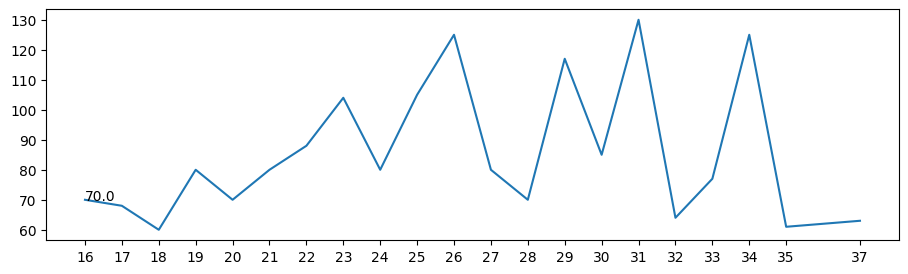

In [45]:
plt.figure(figsize=(11, 3))
res = df_athlete.groupby(['Age'])['Weight'].max()
plt.plot(res.index, res)
plt.annotate(res[16], xy=(16, res[16]), xytext=(16, res[16]))
plt.xticks(res.index)

3. Tracer un histogramme représentant la distribution des athlètes en fonction de 4 intervalles d'âges

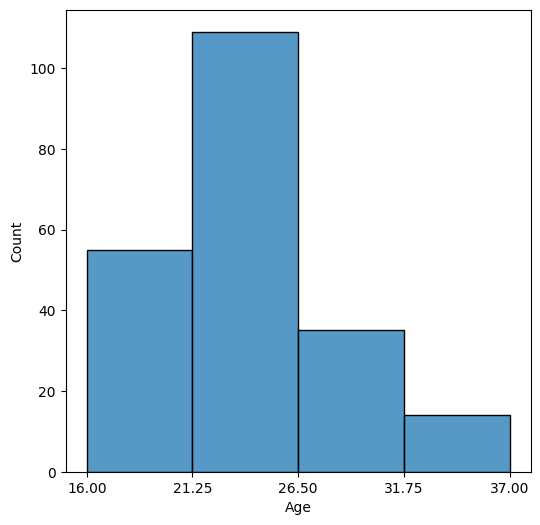

In [52]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.histplot(x="Age", data=df_athlete, bins=4)
xticks = np.linspace(df_athlete['Age'].min(), df_athlete['Age'].max(), 5)
plt.xticks(xticks)
plt.show()

4.  Créer une figure de dimensions 3*11 pouces (in) comprenaant 2 axes alignés horizontalement, représentant la distribution des athlètes selon leur sport. Le premier axe doit afficher un histogramme, tandis que le deuxième doit afficher un diagramme en secteurs

<Axes: xlabel='Sport', ylabel='Count'>

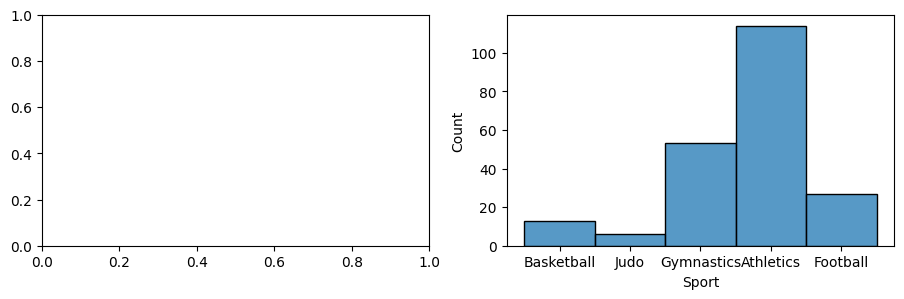

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(11,3))
sns.histplot(x='Sport', data=df_athlete)
# TODO: Complete 
#axs[0].plot(df_athlete['Sport'].unique(), df_athlete['Sport'])
#df_athlete['Sport'].value_counts().plot.pie()

5. Tracer le nuage de points (scatter) de Height en fonction de Weight ainsi que de Height en fonction d'Age. Ajouter une légende à la figure et supprimer les titres des axis.

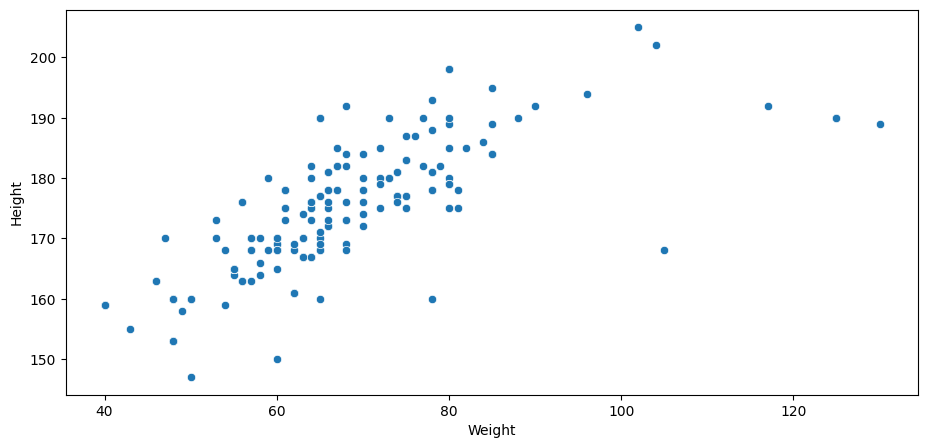

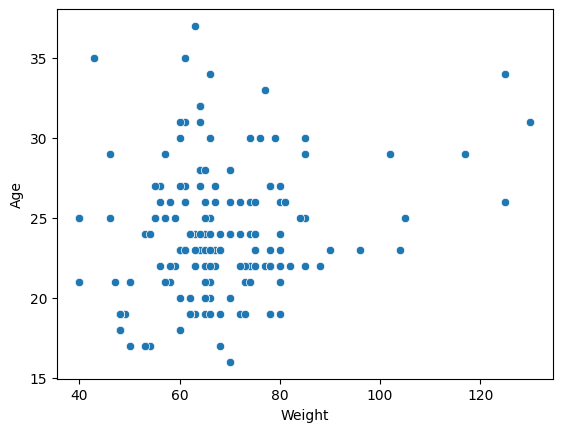

In [86]:
plt.figure(figsize=(11, 5))
sns.scatterplot(data=df_athlete, x="Weight", y="Height")
plt.show()
sns.scatterplot(data=df_athlete, x="Weight", y="Age")
#plt.legend(['Weight', 'Height'], loc=0)
plt.show()

6. Tracer une heatmap représentant les statistiques descriptives de df_athletes pour chaque attribut (moyenne, écart-type, etc.)

<Axes: >

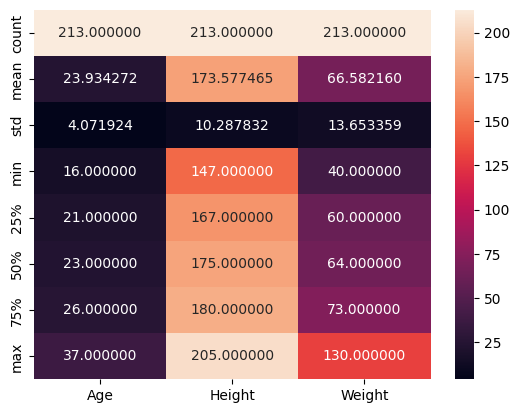

In [101]:
df_athlete
#sns.heatmap(df_athlete.iloc[:3,[2,3]],
            # annot=True,
            # fmt='f',
            # cbar=True)

desc = df_athlete.describe()
df_athlete.describe()
sns.heatmap(df_athlete.describe(),
            annot=True,
            fmt='f',
            cbar=True)
#print(desc.loc[["count", ]])
#values = [desc[]]
#stats = pd.DataFrame()
# age_stats = desc.iloc[:, [0]]
# height_stats = desc.iloc[:, [1]]
# weight_stats = desc.iloc[:, [2]]
# height_stats